First order differential equations


Reference model
\begin{cases} y' = f(x,y) \\ y(0)= y_0\end{cases}

Example
Differential equation:

\begin{cases} y' = -{y^2\over x^2} \\ y(1)= {1\over 2}\end{cases}



​Analytical solution in Python (SymPy):



**Initialization and symbolic variables**

In [ ]:
# Symbolic library and its initialization
import sympy as sy

sy.init_printing()

# For function plot
from sympy.plotting import plot

# Some common variables
x = sy.symbols('x')

y = sy.Function('y')

y1 = sy.Derivative(y(x), x)

#print(y1)

**General solution**

In [ ]:
# General solution

# Definition
eqdiff = y1 + (y(x)**2)/x**2

# Solution
sol = sy.dsolve(eqdiff, y(x))

# Print
sy.pprint(sol)

         -x    
y(x) = ────────
       C₁⋅x + 1


**Task 1**
Solve the differential equation 
$y
′
=
2
t
(
25
−
y
)$
.

**Solution with the initial condition**

In [ ]:
# Solution with the given initial conditions
sol = sy.dsolve(eqdiff, y(x),ics={y(1): '1/2'})
sy.pprint(sol)


         -x   
y(x) = ───────
       1 - 3⋅x


**Task 2:** Solve the initial value problem:
$d
y/
d
x
=
2
x
,
y
(
0
)
=
2$
.

**Plot and svg**

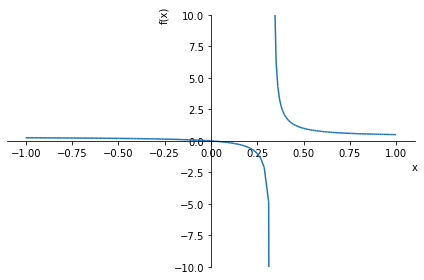

In [ ]:
# Plotting

title = sy.latex(sol.rhs)
xtol = 1e-3
p1 = plot(sol.rhs, (x,-1,1/3-xtol), show=False, ylim=[-10,10],)
p2 = plot(sol.rhs, (x,1/3+xtol,1), show=False, ylim=[-10,10])
p1.extend(p2)
p1.show()

# Save in svg format
#p1.save("ode-1.svg")

**Plot using matplotlib**

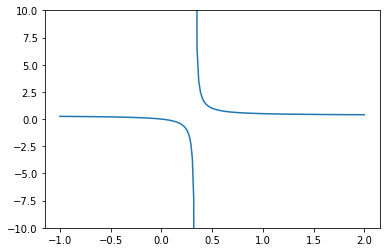

In [ ]:
# plot using matplotlib
f = sy.lambdify(x, sol.rhs, 'numpy')

import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(-1, 1/3-xtol, num=100)
x2 = np.linspace(1/3+xtol, 2, num=100)

plt.plot(x1, f(x1), '-', c='C0')
plt.plot(x2, f(x2), '-', c='C0')
plt.ylim(-10,10)
plt.savefig("ode-1-mpl.svg")
plt.show()

**Numerical solution in Python (SciPy)**

Initialization and equation in the standard solver format

In [ ]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Model
def model(y, t):
    dydt = -y**2/t**2
    return dydt

**Numerical solution in a given interval**

In [ ]:
# Solution
# t = np.linspace(1, 10, 100)
# y0 = 1/2
# sol = odeint(model, y0, t)

# print(t,sol)

**Plot and svg export**

In [ ]:
# # plot
# #plt.figure(figsize=(11,9))
# plt.plot(t,sol, label="y")
# plt.legend()

# # Save in svg format
# plt.savefig("ode_num-1.svg")
# plt.show()

***ASSIGNMENT***

**QUESTION1:**
Solve the differential equation 
$y
′
=
2
t
(
25
−
y
)$
.

**QUESTION2:** Solve the initial value problem:
$d
y/
d
x
=
2
x
,
y
(
0
)
=
2$
.

**QUESTION3:**
Consider the equation of a freely falling object
$dv/
dt
= g – bv^2$
1. Solve the differential equation where Take $b = 1$ and $g = 10$
2. Plot $v$ vs $t$
3. Plot $b$ vs $t$ in different values of $b$, i.e $b = 1,$ $b = 2,$ $b = 3$, $b = -4$, and $b = -2$.

## Solution 1

In [1]:
# Symbolic library and its initialization
import sympy as sy

sy.init_printing()

# For function plot
from sympy.plotting import plot

# Some common variables
t = sy.symbols('t')

y = sy.Function('y')

y1 = sy.Derivative(y(t), t)

#print(y1)

# General solution

# Definition
eqdiff = y1 - 2*t*(25 - y(t))

# Solution
sol = sy.dsolve(eqdiff, y(t))

# Print
sy.pprint(sol)


             2     
           -t      
y(t) = C₁⋅ℯ    + 25


## Solution 2

In [2]:
x = sy.symbols('x')

y1 = sy.Derivative(y(x), x)

#print(y1)

# General solution

# Definition
eqdiff = y1 - 2*x

# Solution
sol = sy.dsolve(eqdiff, y(x))

sol = sy.dsolve(eqdiff, y(x),ics={y(0): '2'})
sy.pprint(sol)



        2    
y(x) = x  + 2


## Solution 3.1

In [3]:
t = sy.symbols('t')

v = sy.Function('v')

v1 = sy.Derivative(v(t), t)

#print(y1)

# General solution

# Definition
eqdiff = v1 - (10 - 1*(v(t)**2))

# Solution
sol = sy.dsolve(eqdiff, v(t))

# Print
sy.pprint(sol)


            -√10       
v(t) = ────────────────
       tanh(C₁ - √10⋅t)


## Solution 3.2

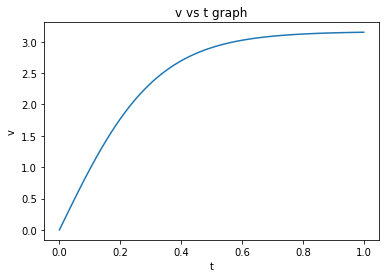

In [26]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Model
def dvdt(t, v):
    return 10 - 1*v**2
v0 = 0

t = np.linspace(0, 1, 100)
sol = odeint(dvdt, y0=v0, t=t, tfirst=True)

plt.plot(t, sol)
plt.title('v vs t graph')
plt.ylabel('v')
plt.xlabel('t')
plt.show()


## Solution 3.3

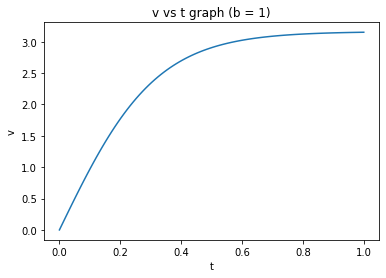

In [27]:
sol_1 = odeint(lambda t, v: 10 - 1*v**2, y0=v0, t=t, tfirst=True)
plt.plot(t, sol_1)

plt.title('v vs t graph (b = 1)')
plt.ylabel('v')
plt.xlabel('t')
plt.show()


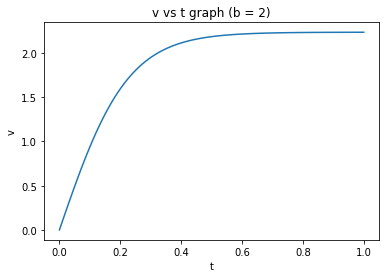

In [28]:
sol_2 = odeint(lambda t, v: 10 - 2*v**2, y0=v0, t=t, tfirst=True)
plt.plot(t, sol_2)

plt.title('v vs t graph (b = 2)')
plt.ylabel('v')
plt.xlabel('t')
plt.show()


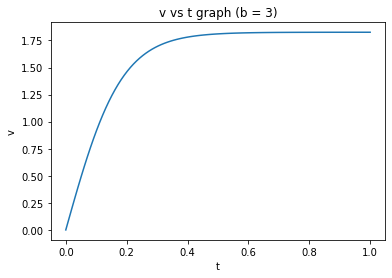

In [29]:
sol_3 = odeint(lambda t, v: 10 - 3*v**2, y0=v0, t=t, tfirst=True)
plt.plot(t, sol_3)

plt.title('v vs t graph (b = 3)')
plt.ylabel('v')
plt.xlabel('t')
plt.show()


/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


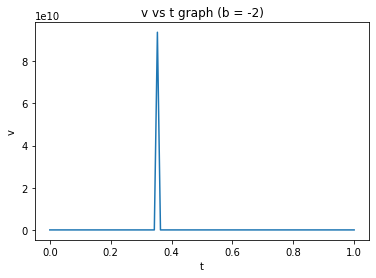

In [30]:
sol_4 = odeint(lambda t, v: 10 + 2*v**2, y0=v0, t=t, tfirst=True)
plt.plot(t, sol_4)

plt.title('v vs t graph (b = -2)')
plt.ylabel('v')
plt.xlabel('t')
plt.show()


/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


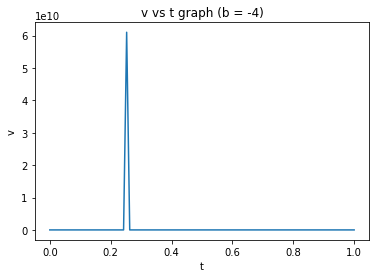

In [31]:
sol_5 = odeint(lambda t, v: 10 + 4*v**2, y0=v0, t=t, tfirst=True)
plt.plot(t, sol_5)

plt.title('v vs t graph (b = -4)')
plt.ylabel('v')
plt.xlabel('t')
plt.show()
